In [2]:
from __future__ import print_function
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D, merge
from keras.utils import np_utils
from keras.optimizers import SGD
from keras import backend as K
from keras.models import Model
from keras.layers.core import Lambda
from keras.callbacks import ModelCheckpoint
import pandas
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

Using TensorFlow backend.


In [3]:
K.set_image_dim_ordering('tf')

batch_size = 32
nb_classes = 10
nb_epoch = 375
rows, cols = 32, 32
channels = 3

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
(img_train, lbl_train), (img_test, lbl_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

print (X_train.shape[1:])

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(32, 32, 3)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
categoryid :[9]
category : truck


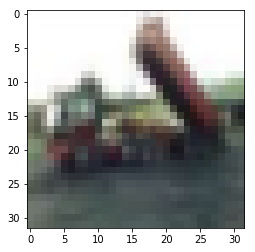

In [5]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
imgid = 2
image = img_train[imgid]
image = image.astype('float32')
image /= 255

%matplotlib inline
imgplot = plt.imshow(image)

categoryid = lbl_train[imgid]

print(categories)
print("categoryid :"+str(categoryid))
print("category : "+str(categories[categoryid[0]]))

In [6]:
model = Sequential()

model.add(Conv2D(96, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(96, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(96, (3, 3), padding='same', strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(192, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(192, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(192, (3, 3), padding='same', strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(192, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(192, (1, 1), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(10, (1, 1), padding='valid'))

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
__________

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) 

datagen.fit(X_train)
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max')

callbacks_list = [checkpoint]
# Fit the model on the batches generated by datagen.flow().
history_callback = model.fit_generator(datagen.flow(X_train, Y_train,
                                    batch_size=batch_size),
                                    steps_per_epoch=2000,
                                    epochs=nb_epoch,
                                    validation_data=(X_test, Y_test),
                                    callbacks=callbacks_list, verbose=1)





Epoch 1/375
2000/2000 [==============================] - 70s 35ms/step - loss: 1.8727 - acc: 0.2911 - val_loss: 1.5216 - val_acc: 0.4299

Epoch 00001: val_acc improved from -inf to 0.42990, saving model to weights.hdf5
Epoch 2/375
2000/2000 [==============================] - 68s 34ms/step - loss: 1.4043 - acc: 0.4866 - val_loss: 1.1808 - val_acc: 0.5646

Epoch 00002: val_acc improved from 0.42990 to 0.56460, saving model to weights.hdf5
Epoch 3/375
2000/2000 [==============================] - 68s 34ms/step - loss: 1.1462 - acc: 0.5872 - val_loss: 1.0267 - val_acc: 0.6356

Epoch 00003: val_acc improved from 0.56460 to 0.63560, saving model to weights.hdf5
Epoch 4/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.9940 - acc: 0.6449 - val_loss: 0.8735 - val_acc: 0.6917

Epoch 00004: val_acc improved from 0.63560 to 0.69170, saving model to weights.hdf5
Epoch 5/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.8672 - acc: 0.6942 - val_loss: 0.8

2000/2000 [==============================] - 68s 34ms/step - loss: 0.3370 - acc: 0.8834 - val_loss: 0.4541 - val_acc: 0.8661

Epoch 00040: val_acc did not improve from 0.86830
Epoch 41/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.3366 - acc: 0.8826 - val_loss: 0.4484 - val_acc: 0.8712

Epoch 00041: val_acc improved from 0.86830 to 0.87120, saving model to weights.hdf5
Epoch 42/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.3426 - acc: 0.8797 - val_loss: 0.4329 - val_acc: 0.8713

Epoch 00042: val_acc improved from 0.87120 to 0.87130, saving model to weights.hdf5
Epoch 43/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.3344 - acc: 0.8829 - val_loss: 0.5167 - val_acc: 0.8624

Epoch 00043: val_acc did not improve from 0.87130
Epoch 44/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.3323 - acc: 0.8837 - val_loss: 0.4604 - val_acc: 0.8701

Epoch 00044: val_acc did not improve from 0.87130


2000/2000 [==============================] - 68s 34ms/step - loss: 0.2741 - acc: 0.9053 - val_loss: 0.4727 - val_acc: 0.8737

Epoch 00082: val_acc did not improve from 0.88630
Epoch 83/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2708 - acc: 0.9056 - val_loss: 0.5165 - val_acc: 0.8699

Epoch 00083: val_acc did not improve from 0.88630
Epoch 84/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2789 - acc: 0.9022 - val_loss: 0.5013 - val_acc: 0.8800

Epoch 00084: val_acc did not improve from 0.88630
Epoch 85/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2755 - acc: 0.9052 - val_loss: 0.5054 - val_acc: 0.8751

Epoch 00085: val_acc did not improve from 0.88630
Epoch 86/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2713 - acc: 0.9056 - val_loss: 0.5121 - val_acc: 0.8739

Epoch 00086: val_acc did not improve from 0.88630
Epoch 87/375
2000/2000 [==============================] - 68s 34ms/s

2000/2000 [==============================] - 68s 34ms/step - loss: 0.2413 - acc: 0.9160 - val_loss: 0.4781 - val_acc: 0.8907

Epoch 00125: val_acc did not improve from 0.89310
Epoch 126/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2428 - acc: 0.9164 - val_loss: 0.4841 - val_acc: 0.8818

Epoch 00126: val_acc did not improve from 0.89310
Epoch 127/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2395 - acc: 0.9171 - val_loss: 0.5307 - val_acc: 0.8776

Epoch 00127: val_acc did not improve from 0.89310
Epoch 128/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2417 - acc: 0.9158 - val_loss: 0.4857 - val_acc: 0.8827

Epoch 00128: val_acc did not improve from 0.89310
Epoch 129/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2390 - acc: 0.9176 - val_loss: 0.4941 - val_acc: 0.8928

Epoch 00129: val_acc did not improve from 0.89310
Epoch 130/375
2000/2000 [==============================] - 68s 3

2000/2000 [==============================] - 68s 34ms/step - loss: 0.2218 - acc: 0.9240 - val_loss: 0.5202 - val_acc: 0.8862

Epoch 00168: val_acc did not improve from 0.89610
Epoch 169/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2181 - acc: 0.9244 - val_loss: 0.4760 - val_acc: 0.8871

Epoch 00169: val_acc did not improve from 0.89610
Epoch 170/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2160 - acc: 0.9266 - val_loss: 0.4899 - val_acc: 0.8951

Epoch 00170: val_acc did not improve from 0.89610
Epoch 171/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2128 - acc: 0.9267 - val_loss: 0.4937 - val_acc: 0.8909

Epoch 00171: val_acc did not improve from 0.89610
Epoch 172/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2164 - acc: 0.9258 - val_loss: 0.4911 - val_acc: 0.8936

Epoch 00172: val_acc did not improve from 0.89610
Epoch 173/375
2000/2000 [==============================] - 68s 3

2000/2000 [==============================] - 68s 34ms/step - loss: 0.2002 - acc: 0.9321 - val_loss: 0.4563 - val_acc: 0.8985

Epoch 00210: val_acc did not improve from 0.90110
Epoch 211/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.1975 - acc: 0.9315 - val_loss: 0.5046 - val_acc: 0.8922

Epoch 00211: val_acc did not improve from 0.90110
Epoch 212/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.1928 - acc: 0.9338 - val_loss: 0.5018 - val_acc: 0.8887

Epoch 00212: val_acc did not improve from 0.90110
Epoch 213/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.1908 - acc: 0.9352 - val_loss: 0.4690 - val_acc: 0.8976

Epoch 00213: val_acc did not improve from 0.90110
Epoch 214/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.1910 - acc: 0.9353 - val_loss: 0.5225 - val_acc: 0.8911

Epoch 00214: val_acc did not improve from 0.90110
Epoch 215/375
2000/2000 [==============================] - 68s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2000/2000 [==============================] - 68s 34ms/step - loss: 0.1929 - acc: 0.9339 - val_loss: 0.4938 - val_acc: 0.8936

Epoch 00222: val_acc did not improve from 0.90110
Epoch 223/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.1850 - acc: 0.9362 - val_loss: 0.5333 - val_acc: 0.8964

Epoch 00223: val_acc did not improve from 0.90110
Epoch 224/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.1558 - acc: 0.9470 - val_loss: 0.5243 - val_acc: 0.9049

Epoch 00323: val_acc did not improve from 0.90700
Epoch 324/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.1516 - acc: 0.9492 - val_loss: 0.5324 - val_acc: 0.8948

Epoch 00324: val_acc did not improve from 0.90700
Epoch 325/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.1570 - acc: 0.9469 - val_loss: 0.4916 - val_acc: 0.9053

Epoch 00325: val_acc did not improve from 0.90700
Epoch 326/375
 531/2000 [======>.......................] - ETA: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2000/2000 [==============================] - 68s 34ms/step - loss: 0.1497 - acc: 0.9486 - val_loss: 0.5252 - val_acc: 0.9059

Epoch 00330: val_acc did not improve from 0.90700
Epoch 331/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.1508 - acc: 0.9485 - val_loss: 0.5170 - val_acc: 0.9031

Epoch 00331: val_acc did not improve from 0.90700
Epoch 332/375
2000/2000 [==============================] - 68s 34ms/step - loss: 0.1561 - acc: 0.9474 - val_loss: 0.4795 - val_acc: 0.9069

Epoch 00332: val_acc did not improve from 0.90700
Epoch 333/375
1635/2000 [=======================>......] - ETA: 11s - loss: 0.1515 - acc: 0.9482

category : truck
prediction : truck


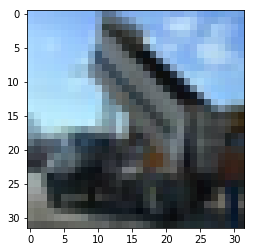

In [54]:
def getImage(id):
    image = img_test[id]
    image = image.astype('float32')
    image /= 255
    return image

def showImage(id):
    image = getImage(id)
    %matplotlib inline
    imgplot = plt.imshow(image)
    labelid = lbl_test[id]
    category = categories[labelid[0]]
    print("category : "+category)    

def predictImage(id):
    image = getImage(id)
    showImage(id)
    image = np.expand_dims(image, axis=0)
    result = model.predict(image)
    result = result[0].tolist()
    best_index=result.index(max(result))
    print ("prediction : "+categories[best_index])
    
    
predictImage(50) 

In [55]:
pandas.DataFrame(history_callback.history).to_csv("history.csv")

model.save('keras_allconv.h5')

In [56]:
model_json = model.to_json()
with open("allconv.json", "w") as json_file:
    json_file.write(model_json)